# Sea Level Predictor: Analyzing Historical Sea Level Rise

**Author:** Hamed Ahmadinia  
**Date:** 14.6.2024

This notebook examines the rise in sea levels and predicts further increases using historic data from the EPA. We will merge linear regression with sophisticated visualisation to investigate the trend of sea-level rise from 1880 to 2050. The modelling of the data is complemented by using joint plots, heatmaps, confidence intervals, and 3D surface plots to acquire an in-depth knowledge of both historical trends and future projections.

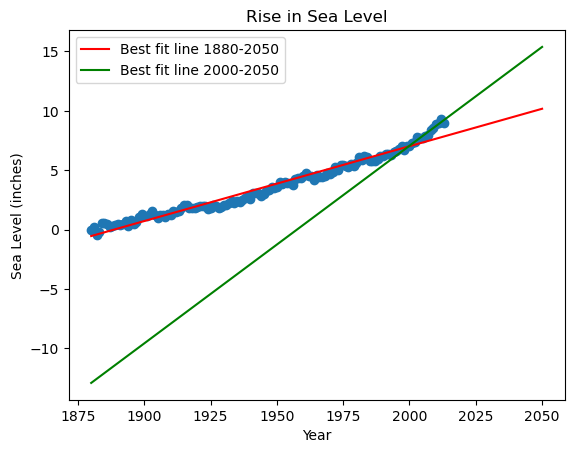

In [8]:
### Step 1: Importing Libraries and Loading Data
# We begin by importing the necessary Python libraries for data analysis and visualization, including `pandas` for data handling, 
#`matplotlib` for creating plots
#`scipy.stats.linregress` for performing linear regression

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Load the dataset
file_path = 'epa-sea-level.csv'
sea_level_data = pd.read_csv(file_path)

# Create scatter plot using Year column as x-axis and CSIRO Adjusted Sea Level as y-axis
plt.scatter(sea_level_data['Year'], sea_level_data['CSIRO Adjusted Sea Level'])

# Perform linear regression on the full dataset
slope, intercept, r_value, p_value, std_err = linregress(sea_level_data['Year'], sea_level_data['CSIRO Adjusted Sea Level'])

# Generate years from the start year to 2050
years_extended = np.arange(sea_level_data['Year'].min(), 2051)

# Calculate the predicted sea levels using the line equation y = mx + b
predicted_sea_levels = slope * years_extended + intercept

# Plot the line of best fit
plt.plot(years_extended, predicted_sea_levels, color='red', label='Best fit line 1880-2050')

# Now plot a second line of best fit from 2000 to the most recent year
recent_data = sea_level_data[sea_level_data['Year'] >= 2000]

# Perform linear regression on the data from year 2000 onwards
slope_recent, intercept_recent, _, _, _ = linregress(recent_data['Year'], recent_data['CSIRO Adjusted Sea Level'])

# Predict sea levels from 2000 to 2050 using this more recent trend
predicted_recent_sea_levels = slope_recent * years_extended + intercept_recent

# Plot the second line of best fit
plt.plot(years_extended, predicted_recent_sea_levels, color='green', label='Best fit line 2000-2050')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

# Display the legend
plt.legend()

# Show the plot
plt.show()

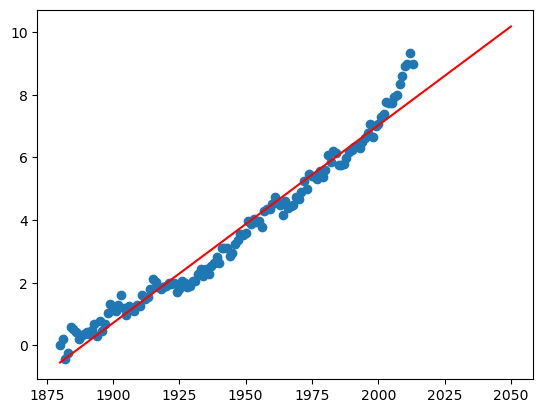

In [10]:
### Step 2: Creating Scatter Plot and Performing Linear Regression
# Next, we create a scatter plot of the data, using the 'Year' column as the x-axis and the 'CSIRO Adjusted Sea Level' as the y-axis. 
# We then perform linear regression to find the line of best fit for the entire dataset (from 1880 onward), which will allow us to model the trend of sea level rise over time.

# Create scatter plot using Year column as x-axis and CSIRO Adjusted Sea Level as y-axis
plt.scatter(sea_level_data['Year'], sea_level_data['CSIRO Adjusted Sea Level'])

# Perform linear regression on the full dataset
slope, intercept, r_value, p_value, std_err = linregress(sea_level_data['Year'], sea_level_data['CSIRO Adjusted Sea Level'])

# Generate years from the start year to 2050
years_extended = np.arange(sea_level_data['Year'].min(), 2051)

# Calculate the predicted sea levels using the line equation y = mx + b
predicted_sea_levels = slope * years_extended + intercept

# Plot the line of best fit
plt.plot(years_extended, predicted_sea_levels, color='red', label='Best fit line 1880-2050')

In [12]:
### Step 3: Calculating the Rate of Sea Level Rise for Different Periods
# Calculate the rate of sea level rise (in inches per year) for the full dataset and recent data

# Full dataset (1880-2050)
rate_full = slope * 10  # inches per decade
print(f"Rate of sea level rise for 1880-2050: {rate_full:.2f} inches per decade")

# Recent data (2000-2050)
rate_recent = slope_recent * 10  # inches per decade
print(f"Rate of sea level rise for 2000-2050: {rate_recent:.2f} inches per decade")

Rate of sea level rise for 1880-2050: 0.63 inches per decade
Rate of sea level rise for 2000-2050: 1.66 inches per decade


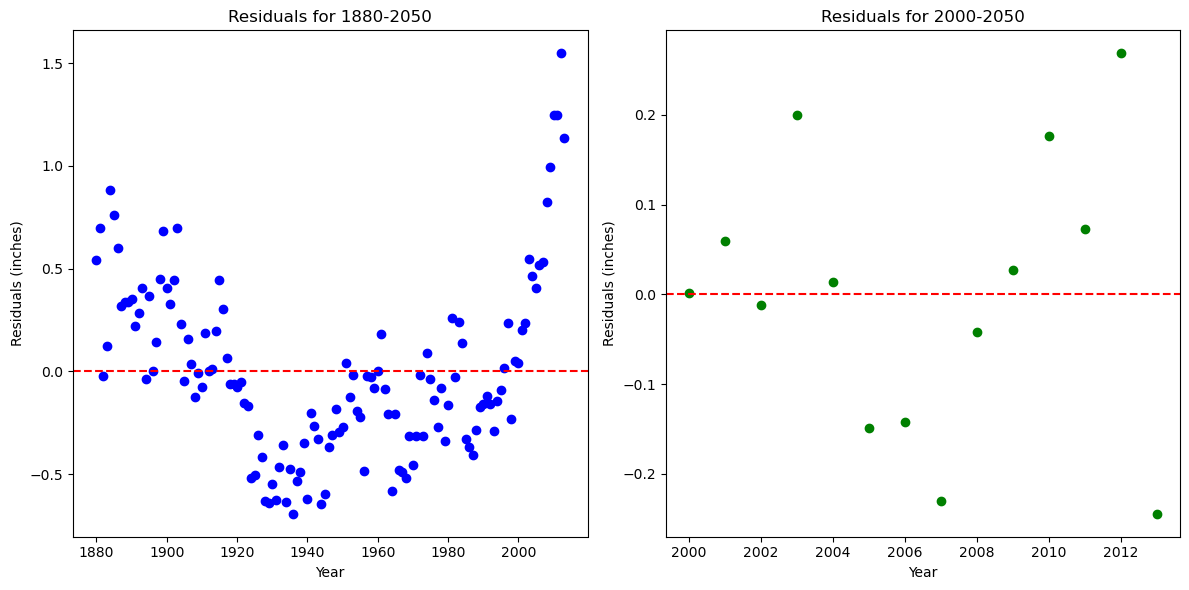

In [14]:
### Step 4: Residual Analysis
# Calculate residuals for the full dataset and recent data to see how well the regression fits the data

# Residuals for full dataset
residuals_full = sea_level_data['CSIRO Adjusted Sea Level'] - (slope * sea_level_data['Year'] + intercept)

# Residuals for recent data
residuals_recent = recent_data['CSIRO Adjusted Sea Level'] - (slope_recent * recent_data['Year'] + intercept_recent)

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(sea_level_data['Year'], residuals_full, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals for 1880-2050')
plt.xlabel('Year')
plt.ylabel('Residuals (inches)')

plt.subplot(1, 2, 2)
plt.scatter(recent_data['Year'], residuals_recent, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals for 2000-2050')
plt.xlabel('Year')
plt.ylabel('Residuals (inches)')

plt.tight_layout()
plt.show()

In [16]:
### Step 5: Projecting Sea Level Rise for Key Future Years
# Project sea levels for specific years (e.g., 2030, 2040, 2050) using both regression models

future_years = [2030, 2040, 2050]

# Full dataset predictions
predicted_full = slope * np.array(future_years) + intercept

# Recent data predictions
predicted_recent = slope_recent * np.array(future_years) + intercept_recent

# Display projections
print("Projected Sea Levels (inches) for key future years:")
for year, full, recent in zip(future_years, predicted_full, predicted_recent):
    print(f"Year {year}: {full:.2f} inches (1880-2050 trend), {recent:.2f} inches (2000-2050 trend)")

Projected Sea Levels (inches) for key future years:
Year 2030: 8.91 inches (1880-2050 trend), 12.05 inches (2000-2050 trend)
Year 2040: 9.55 inches (1880-2050 trend), 13.72 inches (2000-2050 trend)
Year 2050: 10.18 inches (1880-2050 trend), 15.38 inches (2000-2050 trend)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


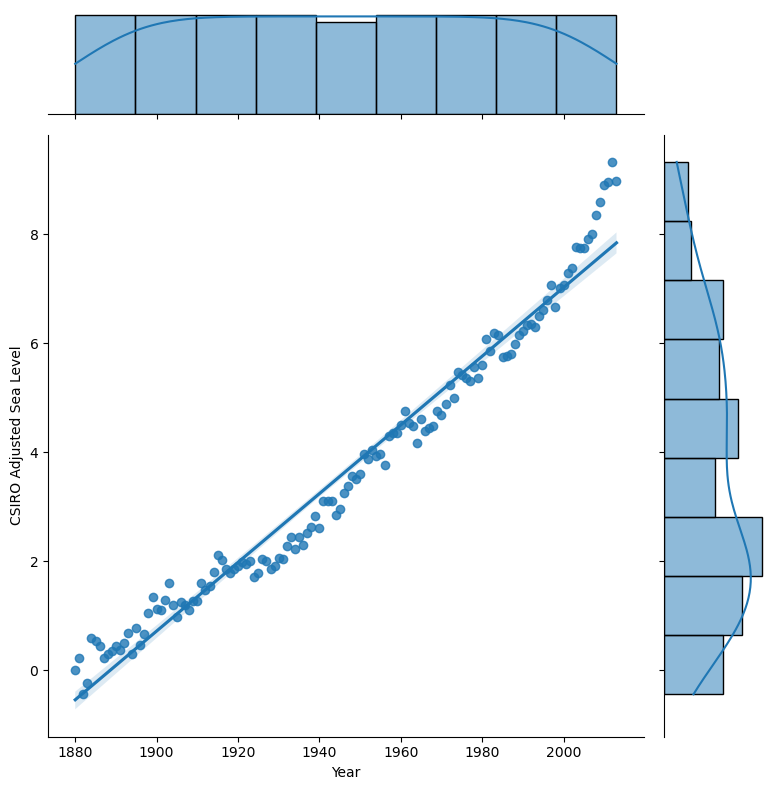

In [18]:
### Step 6: Joint Plot for Year vs. Sea Level
# Using Seaborn to create a joint plot showing the relationship between Year and Sea Level with KDE for distribution

import seaborn as sns

# Create joint plot
sns.jointplot(x='Year', y='CSIRO Adjusted Sea Level', data=sea_level_data, kind='reg', height=8)
plt.show()

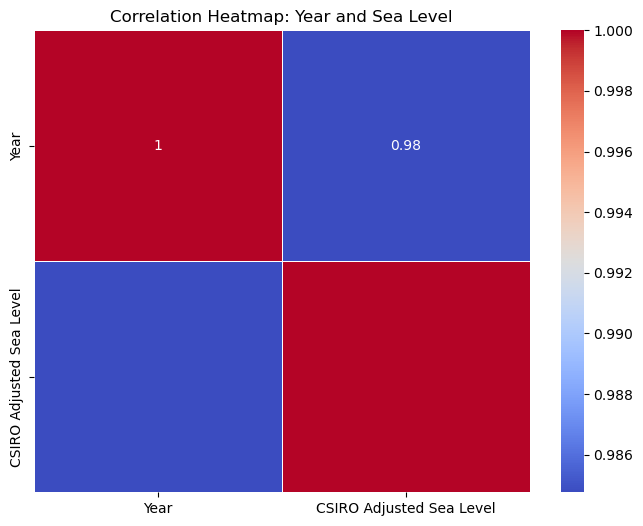

In [20]:
### Step 7: Heatmap for Correlation
# Visualizing correlation between years and sea levels using a heatmap

# Calculate the correlation matrix
corr_matrix = sea_level_data[['Year', 'CSIRO Adjusted Sea Level']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Year and Sea Level')
plt.show()

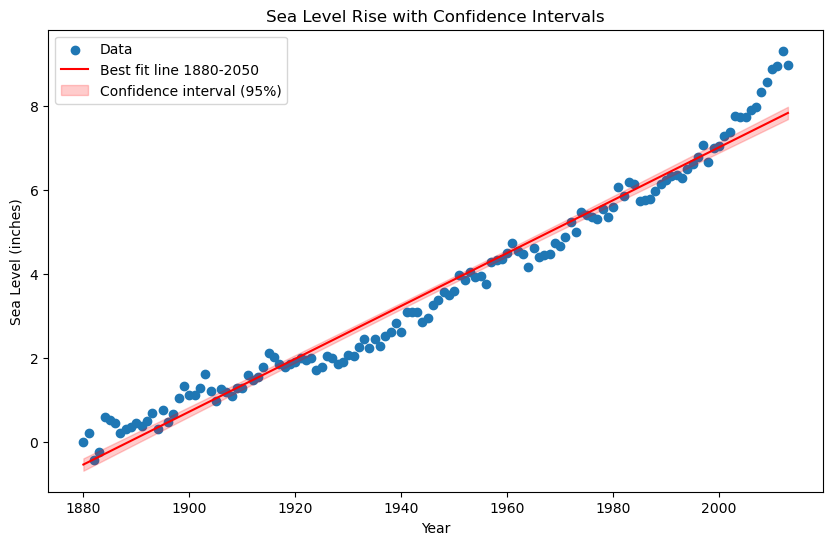

In [22]:
### Step 8: Adding Confidence Intervals for Regression
# Plotting the sea level predictions with confidence intervals to visualize uncertainty in the regression model

import statsmodels.api as sm

# Fit the model for the full dataset (1880-2050) using statsmodels
X_full = sm.add_constant(sea_level_data['Year'])
model_full = sm.OLS(sea_level_data['CSIRO Adjusted Sea Level'], X_full).fit()

# Generate confidence intervals for the full model
pred_full = model_full.get_prediction(X_full)
conf_int_full = pred_full.conf_int()

# Plot data with confidence intervals
plt.figure(figsize=(10, 6))
plt.scatter(sea_level_data['Year'], sea_level_data['CSIRO Adjusted Sea Level'], label='Data')
plt.plot(sea_level_data['Year'], model_full.predict(X_full), color='red', label='Best fit line 1880-2050')
plt.fill_between(sea_level_data['Year'], conf_int_full[:, 0], conf_int_full[:, 1], color='red', alpha=0.2, label='Confidence interval (95%)')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Sea Level Rise with Confidence Intervals')
plt.legend()
plt.show()

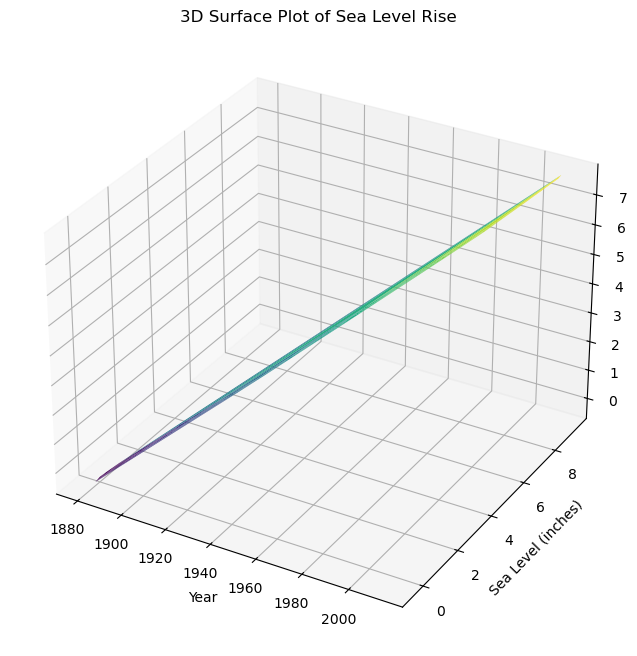

In [24]:
### Step 9: 3D Surface Plot of Sea Level Over Time
# Create a 3D surface plot to visualize the changes in sea levels over time

from mpl_toolkits.mplot3d import Axes3D

# Creating 3D plot data
X = sea_level_data['Year']
Y = sea_level_data['CSIRO Adjusted Sea Level']
Z = slope * X + intercept

# Create a figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_zlabel('Fitted Line')

plt.title('3D Surface Plot of Sea Level Rise')
plt.show()